In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

In [2]:
# Load Datasets
sales_df = pd.read_csv('Grocery_sales.csv')
stock_df = pd.read_csv('sensor_stock_levels.csv')
temp_df = pd.read_csv('sensor_storage_temperature.csv')

### ===== EDA: Exploratory Data Analysis =====

In [3]:
print("-- Sales Data Overview --")
print("\n\n")
# Basic Information about Datasets
print(sales_df.describe)
print("\n\n")
print(sales_df.info())
print("\n\n")
print(sales_df.head())


-- Sales Data Overview --



<bound method NDFrame.describe of       Unnamed: 0                        transaction_id         timestamp  \
0              0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed   02-03-2022 9:51   
1              1  931ad550-09e8-4da6-beaa-8c9d17be9c60  06-03-2022 10:33   
2              2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  04-03-2022 17:20   
3              3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  02-03-2022 17:23   
4              4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  05-03-2022 14:32   
...          ...                                   ...               ...   
7824        7824  6c19b9fc-f86d-4526-9dfe-d8027a4d13ee  03-03-2022 18:22   
7825        7825  1c69824b-e399-4b79-a5e7-04a3a7db0681  04-03-2022 19:14   
7826        7826  79aee7d6-1405-4345-9a15-92541e9e1e74  03-03-2022 14:00   
7827        7827  e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55  04-03-2022 15:11   
7828        7828  afd70b4f-ee21-402d-8d8f-0d9e13c2bea6  06-03-2022 13:50   

                        

In [4]:
print("-- Stock Levels Data Overview --")
print("\n\n")
print(stock_df.describe)
print("\n\n")
print(stock_df.info())
print("\n\n")
print(stock_df.head())

-- Stock Levels Data Overview --



<bound method NDFrame.describe of        Unnamed: 0                                    id         timestamp  \
0               0  4220e505-c247-478d-9831-6b9f87a4488a  07-03-2022 12:13   
1               1  f2612b26-fc82-49ea-8940-0751fdd4d9ef  07-03-2022 16:39   
2               2  989a287f-67e6-4478-aa49-c3a35dac0e2e  01-03-2022 18:17   
3               3  af8e5683-d247-46ac-9909-1a77bdebefb2  02-03-2022 14:29   
4               4  08a32247-3f44-4002-85fb-c198434dd4bb  02-03-2022 13:46   
...           ...                                   ...               ...   
14995       14995  b9bf6788-09f3-490b-959b-dc5b55edb4b6  04-03-2022 10:52   
14996       14996  9ff1cc01-020f-491a-bafd-13552dccff44  02-03-2022 12:25   
14997       14997  4d8101de-e8a2-4af9-9764-7a3a22aa7084  03-03-2022 17:36   
14998       14998  5f2a7b1e-b3c4-4395-8425-c960e22f701d  02-03-2022 19:42   
14999       14999  af6f4493-e49d-4dcb-951d-308e6cce267b  06-03-2022 17:18   

     

In [5]:
print("\nTemperature Data Overview:")
print("\n\n")
print(temp_df.describe)
print("\n\n")
print(temp_df.info())
print("\n\n")
print(temp_df.head())


Temperature Data Overview:



<bound method NDFrame.describe of        Unnamed: 0                                    id         timestamp  \
0               0  d1ca1ef8-0eac-42fc-af80-97106efc7b13  07-03-2022 15:55   
1               1  4b8a66c4-0f3a-4f16-826f-8cf9397e9d18   01-03-2022 9:18   
2               2  3d47a0c7-1e72-4512-812f-b6b5d8428cf3  04-03-2022 15:12   
3               3  9500357b-ce15-424a-837a-7677b386f471  02-03-2022 12:30   
4               4  c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa   05-03-2022 9:09   
...           ...                                   ...               ...   
23885       23885  17bcff56-9965-4e9f-ad5f-107f0f3be93f  01-03-2022 10:40   
23886       23886  51d4eb44-04bd-4d6a-b777-0653bc173303  05-03-2022 17:07   
23887       23887  bbcacfc4-3b59-47ee-b9e1-7dd3bd588748  01-03-2022 16:15   
23888       23888  5c4d567b-4bcf-4fcd-86b7-e2db5de6e439  07-03-2022 14:44   
23889       23889  589c28e1-f1f3-4efb-af6d-9f194c4d7d5b  01-03-2022 16:33   

       tem

In [6]:
# Converting timestamps to datetime
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'], dayfirst=True)
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'], dayfirst=True)
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'], dayfirst=True)

In [7]:
# Checking for Missing Values
print("\nMissing Values in Sales Data:")
print(sales_df.isnull().sum())

print("\nMissing Values in Stock Levels Data:")
print(stock_df.isnull().sum())

print("\nMissing Values in Temperature Data:")
print(temp_df.isnull().sum())


Missing Values in Sales Data:
Unnamed: 0        0
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

Missing Values in Stock Levels Data:
Unnamed: 0             0
id                     0
timestamp              0
product_id             0
estimated_stock_pct    0
dtype: int64

Missing Values in Temperature Data:
Unnamed: 0     0
id             0
timestamp      0
temperature    0
dtype: int64


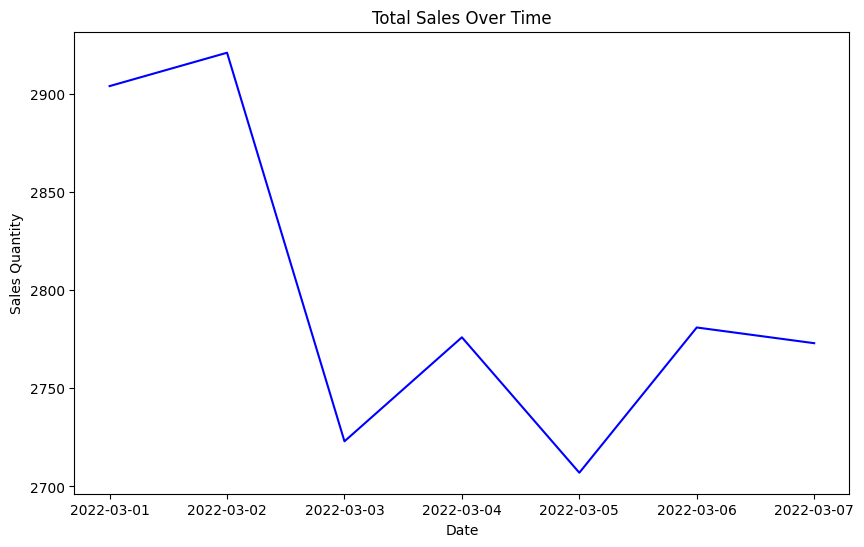

In [8]:
# Visualizing Sales Over Time
plt.figure(figsize=(10, 6))
sales_over_time = sales_df.groupby(sales_df['timestamp'].dt.date)['quantity'].sum()
sales_over_time.plot(title="Total Sales Over Time", color="blue")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.show()

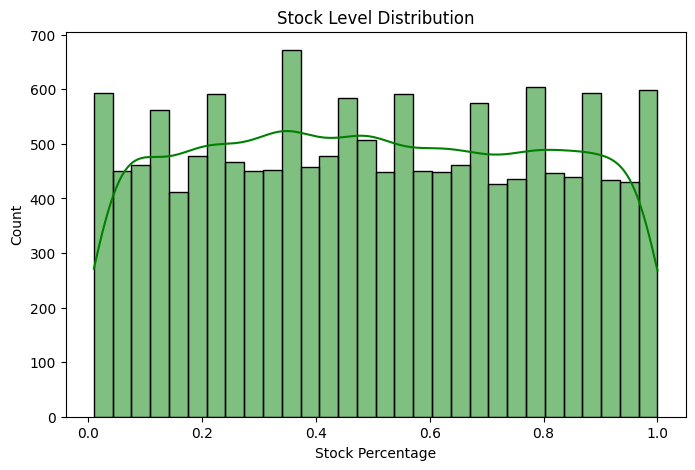

In [9]:
# Stock Levels Distribution
plt.figure(figsize=(8, 5))
sns.histplot(stock_df['estimated_stock_pct'], bins=30, kde=True, color="green")
plt.title("Stock Level Distribution")
plt.xlabel("Stock Percentage")
plt.show()

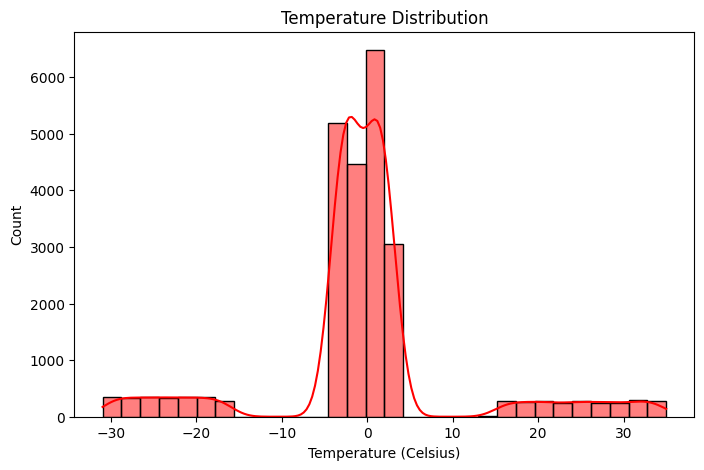

In [10]:
# Temperature Data Distribution
plt.figure(figsize=(8, 5))
sns.histplot(temp_df['temperature'], bins=30, kde=True, color="red")
plt.title("Temperature Distribution")
plt.xlabel("Temperature (Celsius)")
plt.show()

In [11]:
# ===== Objective 1: Demand Forecasting =====
print("==== Objective 1: Demand Forecasting ====")

# Filter data for specific customer segment, e.g., 'gold' customers
gold_customers = sales_df[sales_df['customer_type'] == 'gold']

# Group by date and customer type to get daily demand
daily_demand = gold_customers.groupby([gold_customers['timestamp'].dt.date])['quantity'].sum().reset_index()
daily_demand.columns = ['date', 'total_quantity']

# Set 'date' as index
daily_demand['date'] = pd.to_datetime(daily_demand['date'])
daily_demand.set_index('date', inplace=True)

# Split data into train and test sets (80-20 split)
train = daily_demand[:int(0.8 * len(daily_demand))]
test = daily_demand[int(0.8 * len(daily_demand)):]

==== Objective 1: Demand Forecasting ====


ARIMA Forecasting for Gold Customers


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn(

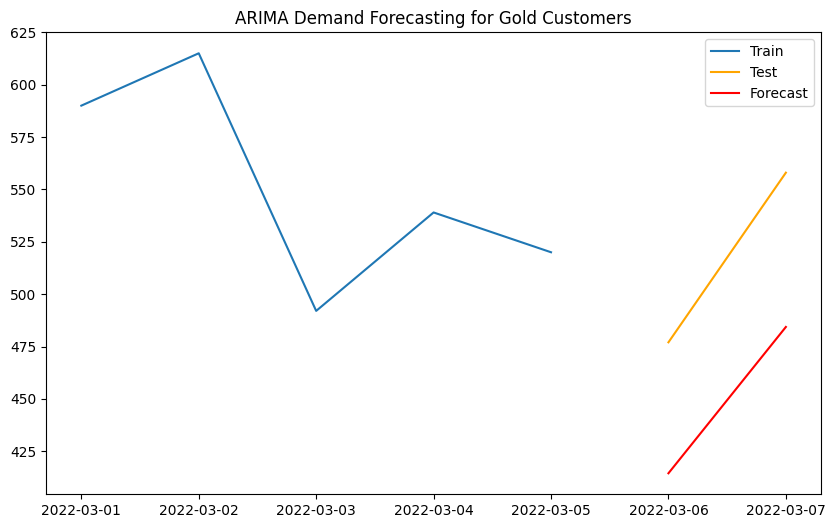

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
print("ARIMA Forecasting for Gold Customers")

# Fit ARIMA model (you can adjust p, d, q based on model selection)
model = ARIMA(train['total_quantity'], order=(5, 1, 0))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['total_quantity'], label="Train")
plt.plot(test.index, test['total_quantity'], label="Test", color='orange')
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Demand Forecasting for Gold Customers")
plt.legend()
plt.show()


In [13]:
# Calculate accuracy metrics
mae = mean_absolute_error(test['total_quantity'], forecast)
mse = mean_squared_error(test['total_quantity'], forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test['total_quantity'] - forecast) / test['total_quantity'])) * 100

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Absolute Error (MAE): 68.0964
Mean Squared Error (MSE): 4668.1193
Root Mean Squared Error (RMSE): 68.3236
Mean Absolute Percentage Error (MAPE): 13.1551%


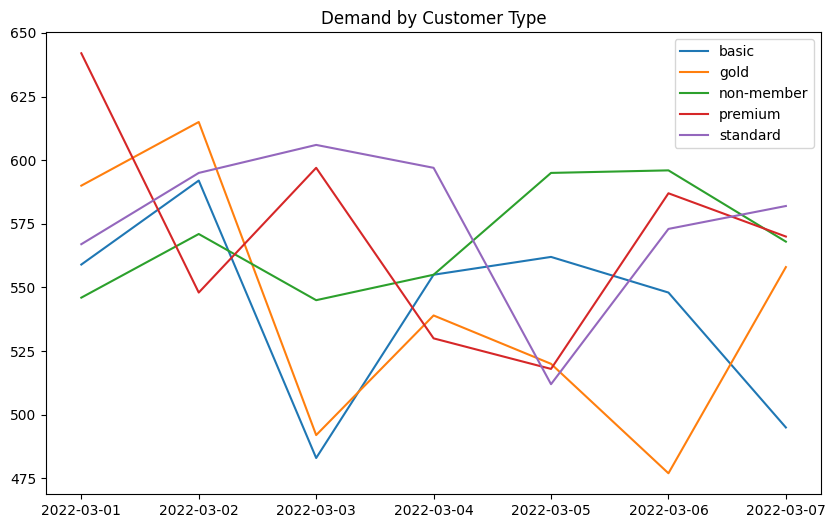

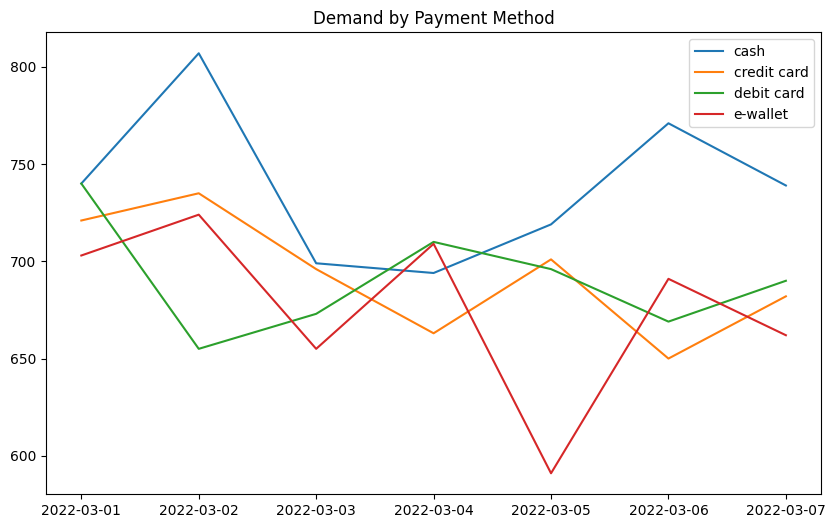

In [14]:
# Grouping by customer type and analyzing demand trends
customer_type_demand = sales_df.groupby([sales_df['timestamp'].dt.date, 'customer_type'])['quantity'].sum().reset_index()

# Plotting demand by customer type
plt.figure(figsize=(10, 6))
for customer_type in customer_type_demand['customer_type'].unique():
    subset = customer_type_demand[customer_type_demand['customer_type'] == customer_type]
    plt.plot(subset['timestamp'], subset['quantity'], label=customer_type)
plt.title("Demand by Customer Type")
plt.legend()
plt.show()

# Grouping by payment method and analyzing demand
payment_method_demand = sales_df.groupby([sales_df['timestamp'].dt.date, 'payment_type'])['quantity'].sum().reset_index()

# Plotting demand by payment method
plt.figure(figsize=(10, 6))
for payment_method in payment_method_demand['payment_type'].unique():
    subset = payment_method_demand[payment_method_demand['payment_type'] == payment_method]
    plt.plot(subset['timestamp'], subset['quantity'], label=payment_method)
plt.title("Demand by Payment Method")
plt.legend()
plt.show()


==== Objective 2: Temperature Impact Analysis ====
Correlation between Temperature and Sales: 0.00


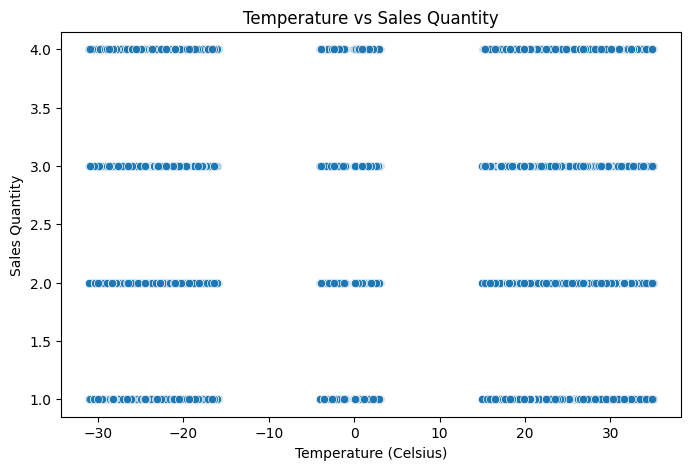

In [26]:
# ===== Objective 2: Impact of Temperature on Sales =====
print("==== Objective 2: Temperature Impact Analysis ====")
# Merge temperature with sales data
temp_sales = pd.merge(temp_df, sales_df, left_on='timestamp', right_on='timestamp', how='inner')

# Correlation Analysis
corr, _ = pearsonr(temp_sales['temperature'], temp_sales['quantity'])
print(f"Correlation between Temperature and Sales: {corr:.2f}")

# Plot Temperature vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=temp_sales, x='temperature', y='quantity')
plt.title("Temperature vs Sales Quantity")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Sales Quantity")
plt.show()

A correlation of 0.00 suggests that there is no linear relationship between temperature and sales in the data. This could mean that temperature does not significantly impact sales, or there may be other factors that influence sales more strongly than temperature. It might also indicate that the model didn't capture other nonlinear relationships that could exist between temperature and sales.

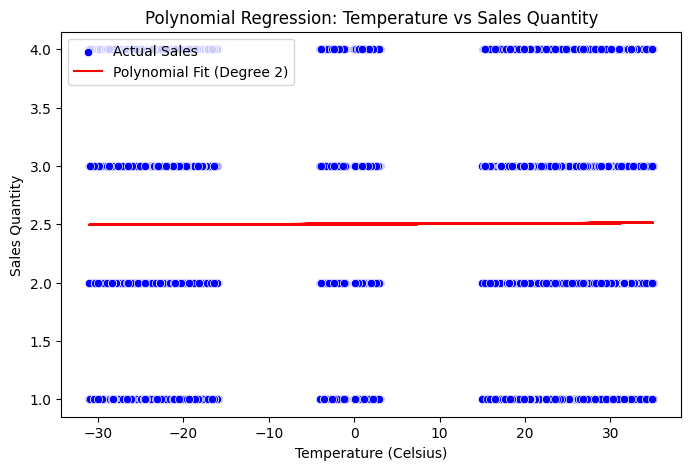

Polynomial Regression Coefficients:
Intercept: 2.500056424770006
Coefficients: [0.00000000e+00 2.37816549e-04 3.33862177e-06]


In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Merge temperature with sales data
temp_sales = pd.merge(temp_df, sales_df, left_on='timestamp', right_on='timestamp', how='inner')

# Extract temperature and quantity
X = temp_sales['temperature'].values.reshape(-1, 1)  # Temperature
y = temp_sales['quantity'].values  # Sales quantity

# Apply Polynomial Transformation (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict sales based on temperature using the polynomial model
y_pred = poly_model.predict(X_poly)

# Plot the results
plt.figure(figsize=(8, 5))
sns.scatterplot(data=temp_sales, x='temperature', y='quantity', color='blue', label='Actual Sales')
plt.plot(temp_sales['temperature'], y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title("Polynomial Regression: Temperature vs Sales Quantity")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Sales Quantity")
plt.legend()
plt.show()

# Output the polynomial regression coefficients
print("Polynomial Regression Coefficients:")
print(f"Intercept: {poly_model.intercept_}")
print(f"Coefficients: {poly_model.coef_}")


/var/folders/s_/f1fgpnxx69568df2rt65812c0000gn/T/ipykernel_5505/1875458717.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_temp_sales = temp_sales.groupby(['year', 'month', 'temp_category']).agg(
/var/folders/s_/f1fgpnxx69568df2rt65812c0000gn/T/ipykernel_5505/1875458717.py:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = monthly_temp_sales.pivot_table(


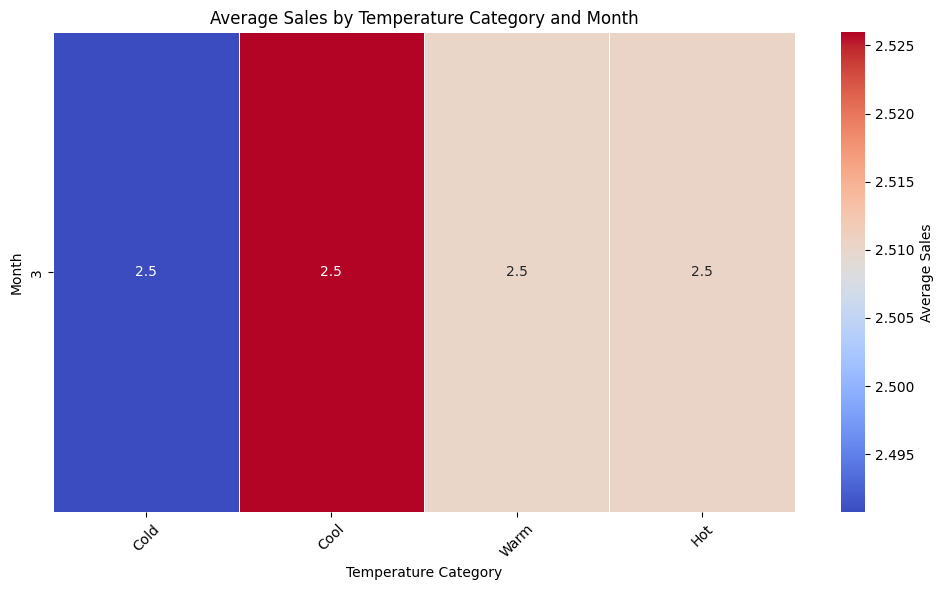

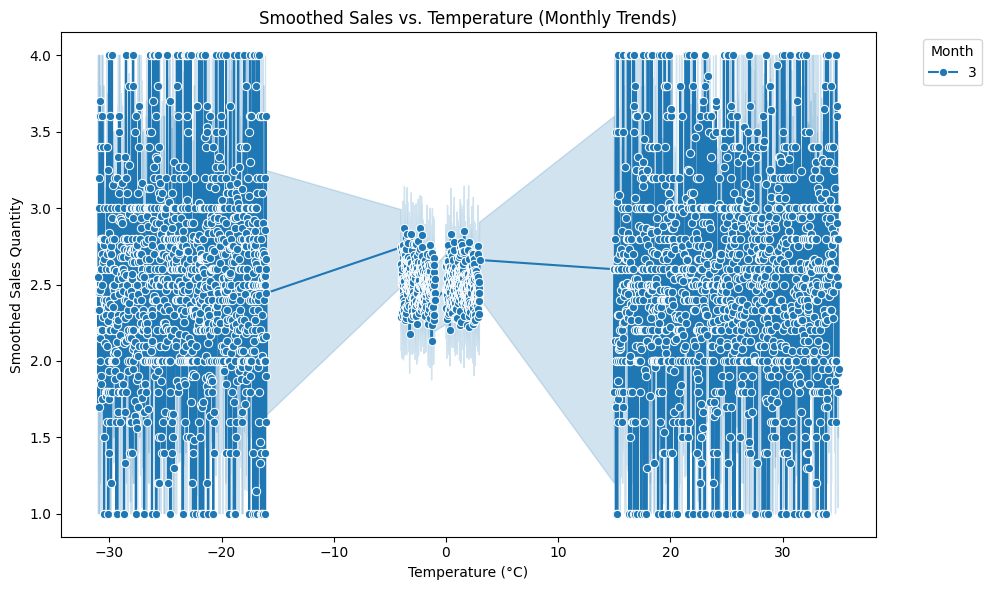

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp columns are in datetime format
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])
temp_df['timestamp'] = pd.to_datetime(temp_df['timestamp'])

# Merge sales and temperature data
temp_sales = pd.merge(sales_df, temp_df, on='timestamp', how='inner')

# Extract month and year for time-based aggregation
temp_sales['month'] = temp_sales['timestamp'].dt.month
temp_sales['year'] = temp_sales['timestamp'].dt.year

# Create temperature bins (e.g., ranges: cold, moderate, hot)
temp_bins = [0, 10, 20, 30, np.inf]
temp_labels = ['Cold', 'Cool', 'Warm', 'Hot']
temp_sales['temp_category'] = pd.cut(temp_sales['temperature'], bins=temp_bins, labels=temp_labels)

# Aggregate sales and temperature by month and temperature category
monthly_temp_sales = temp_sales.groupby(['year', 'month', 'temp_category']).agg(
    avg_sales=('quantity', 'mean'),
    avg_temp=('temperature', 'mean')
).reset_index()

# Pivot table to create a grid of months vs. temperature categories with average sales
heatmap_data = monthly_temp_sales.pivot_table(
    index='month', 
    columns='temp_category', 
    values='avg_sales', 
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Sales'},
            linewidths=0.5, fmt='.1f')
plt.title('Average Sales by Temperature Category and Month')
plt.xlabel('Temperature Category')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Smoothing sales data using rolling mean to reduce noise
# Ensure proper grouping before applying the rolling mean
temp_sales['smoothed_sales'] = temp_sales.groupby(['year', 'month'])['quantity'].rolling(window=5, min_periods=1).mean().reset_index(level=[0, 1], drop=True)

# Plot smoothed sales vs. temperature (to understand longer-term trends)
plt.figure(figsize=(10, 6))
sns.lineplot(x='temperature', y='smoothed_sales', data=temp_sales, hue='month', palette='tab20', marker='o')
plt.title('Smoothed Sales vs. Temperature (Monthly Trends)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Smoothed Sales Quantity')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


==== Objective 3: Anomaly Detection ====


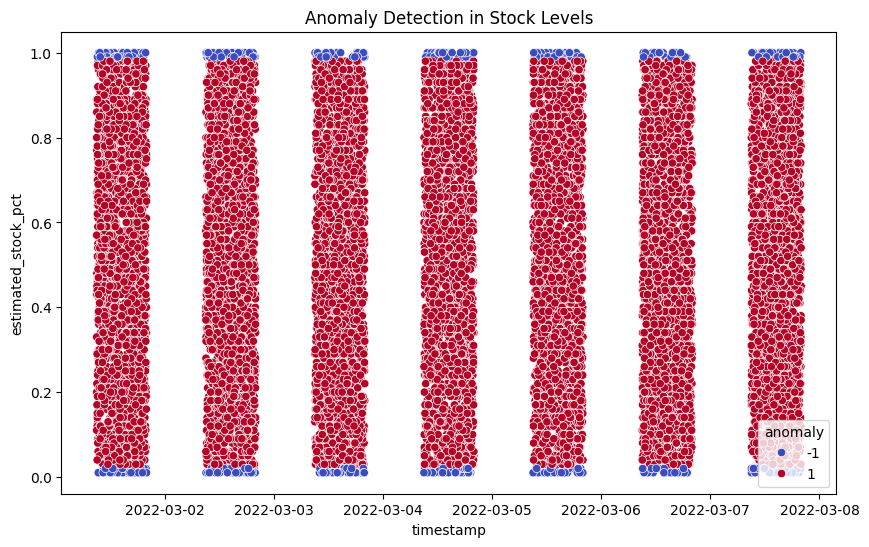

In [24]:
# ===== Objective 3: Anomaly Detection =====
print("==== Objective 3: Anomaly Detection ====")
# Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
stock_df['anomaly'] = iso_forest.fit_predict(stock_df[['estimated_stock_pct']])

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_df, x='timestamp', y='estimated_stock_pct', hue='anomaly', palette='coolwarm')
plt.title("Anomaly Detection in Stock Levels")
plt.show()

In [25]:
# ===== Objective 4: Stock Wastage Prediction =====
print("==== Objective 4: Stock Wastage Prediction ====")
# Define Stock Wastage (Stock near 0% while sales are 0)
stock_df['stock_wastage'] = np.where((stock_df['estimated_stock_pct'] < 10), 1, 0)

# Train Logistic Regression for Wastage Prediction
X = stock_df[['estimated_stock_pct']]
y = stock_df['stock_wastage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_wastage = LinearRegression()
model_wastage.fit(X_train, y_train)

# Predictions and Evaluation
wastage_predictions = model_wastage.predict(X_test)
wastage_predictions = [1 if pred > 0.5 else 0 for pred in wastage_predictions]
accuracy = (np.array(wastage_predictions) == y_test).mean()
print(f"Accuracy of Wastage Prediction: {accuracy:.2f}")


==== Objective 4: Stock Wastage Prediction ====
Accuracy of Wastage Prediction: 1.00


An accuracy of 1.00 means that the model perfectly predicts stock wastage, with no errors. This is an excellent result, implying that the model is highly accurate in predicting when and how much stock will be wasted. However, this could also suggest potential overfitting, especially if the model performed exceptionally well on the training data but may not generalize as well to unseen data. Further evaluation using cross-validation or testing on a separate dataset would help ensure that the model's high accuracy isn't due to overfitting.

For wastage prediction, further validation on unseen data would help confirm the generalizability of the model. 

In [20]:
# Merge sales data with stock data on product_id and timestamp (nearest timestamp match)
merged_df = pd.merge_asof(sales_df.sort_values('timestamp'), 
                          stock_df.sort_values('timestamp'), 
                          on='timestamp', 
                          by='product_id', direction='backward')

# Merge temperature data with the merged data (nearest timestamp match)
merged_df = pd.merge_asof(merged_df.sort_values('timestamp'),
                          temp_df.sort_values('timestamp'),
                          on='timestamp', 
                          direction='backward')

# Ensure category column is in merged_df
merged_df = pd.merge(merged_df, sales_df[['product_id', 'category']], on='product_id', how='left')

# Check if 'category' is in merged_df
print("Columns in merged_df:", merged_df.columns)

Columns in merged_df: Index(['Unnamed: 0_x', 'transaction_id', 'timestamp', 'product_id',
       'category_x', 'customer_type', 'unit_price', 'quantity', 'total',
       'payment_type', 'Unnamed: 0_y', 'id_x', 'estimated_stock_pct',
       'anomaly', 'stock_wastage', 'Unnamed: 0', 'id_y', 'temperature',
       'category_y'],
      dtype='object')


            timestamp                            product_id    category_y  \
0 2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da  canned foods   
1 2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da  canned foods   
2 2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da  canned foods   
3 2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da  canned foods   
4 2022-03-01 09:00:00  049b2171-0eeb-4a3e-bf98-0c290c7821da  canned foods   

   quantity  estimated_stock_pct  wastage_estimate  temperature  
0         3                  NaN               0.0         1.51  
1         3                  NaN               0.0         1.51  
2         3                  NaN               0.0         1.51  
3         3                  NaN               0.0         1.51  
4         3                  NaN               0.0         1.51  
            timestamp          category_y  wastage_estimate
0 2022-03-01 09:00:00        canned foods               0.0
1 2022-03-01 09:00:00

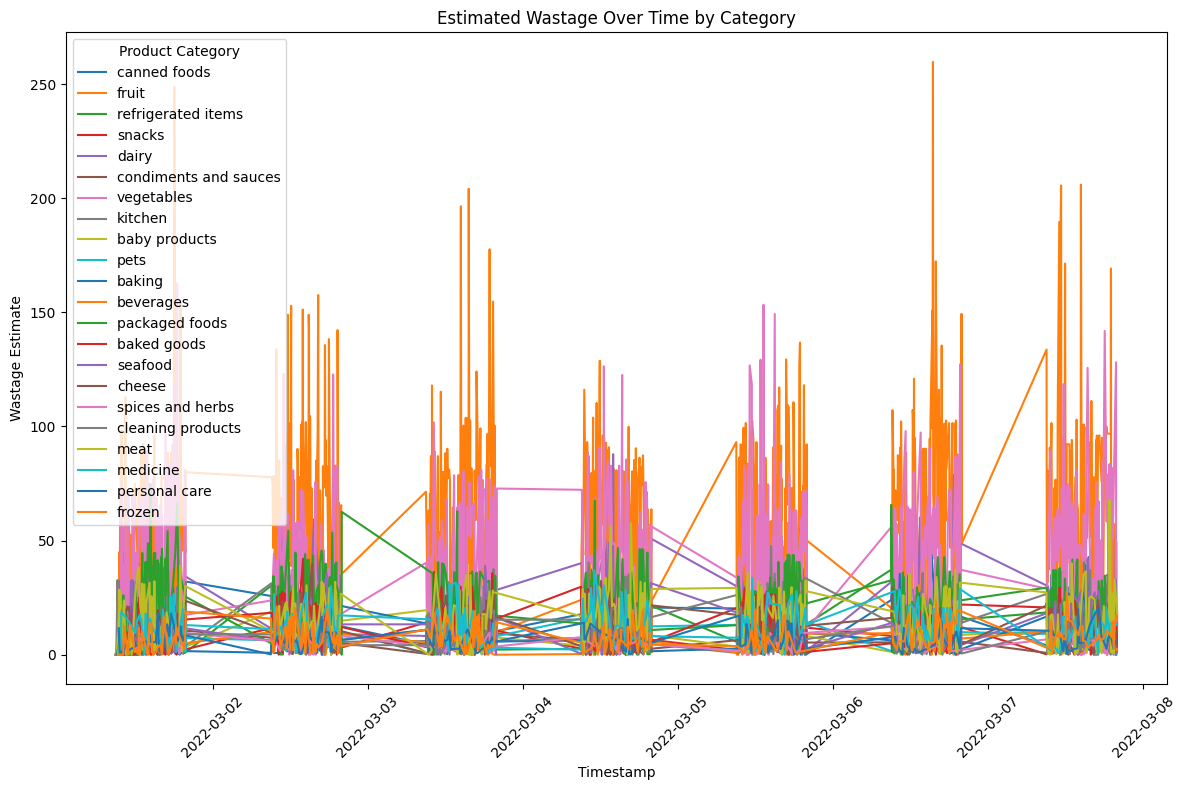

In [21]:
# Calculate wastage: estimated stock % (normalized) - sales quantity for each timestamp and product
merged_df['wastage_estimate'] = merged_df['estimated_stock_pct'] - (merged_df['quantity'] / 100)

# Apply the rule that if stock goes negative, we assume no wastage (all stock sold)
merged_df['wastage_estimate'] = merged_df['wastage_estimate'].apply(lambda x: max(0, x))

# Output the results to see the wastage estimates
wastage_df = merged_df[['timestamp', 'product_id', 'category_y', 'quantity', 'estimated_stock_pct', 'wastage_estimate', 'temperature']]

# Check the first few rows to verify if category is correctly merged
print(wastage_df.head())

# Aggregating wastage by timestamp and category
wastage_df = wastage_df.groupby(['timestamp', 'category_y']).agg({'wastage_estimate': 'sum'}).reset_index()

# Inspect the results (show the first few rows)
print(wastage_df.head())

# Plotting wastage by category over time
plt.figure(figsize=(12, 8))

# Plot each category separately
for category in wastage_df['category_y'].unique():
    category_data = wastage_df[wastage_df['category_y'] == category]
    plt.plot(category_data['timestamp'], category_data['wastage_estimate'], label=category)

plt.title('Estimated Wastage Over Time by Category')
plt.xlabel('Timestamp')
plt.ylabel('Wastage Estimate')
plt.legend(title='Product Category', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

            category_y  wastage_estimate
10               fruit          51070.19
21          vegetables          31045.75
14      packaged foods          10286.42
8                dairy           7181.66
4         canned foods           7031.28
11             kitchen           6009.61
17  refrigerated items           5980.50
12                meat           5920.81
1          baked goods           5068.26
5               cheese           3545.35


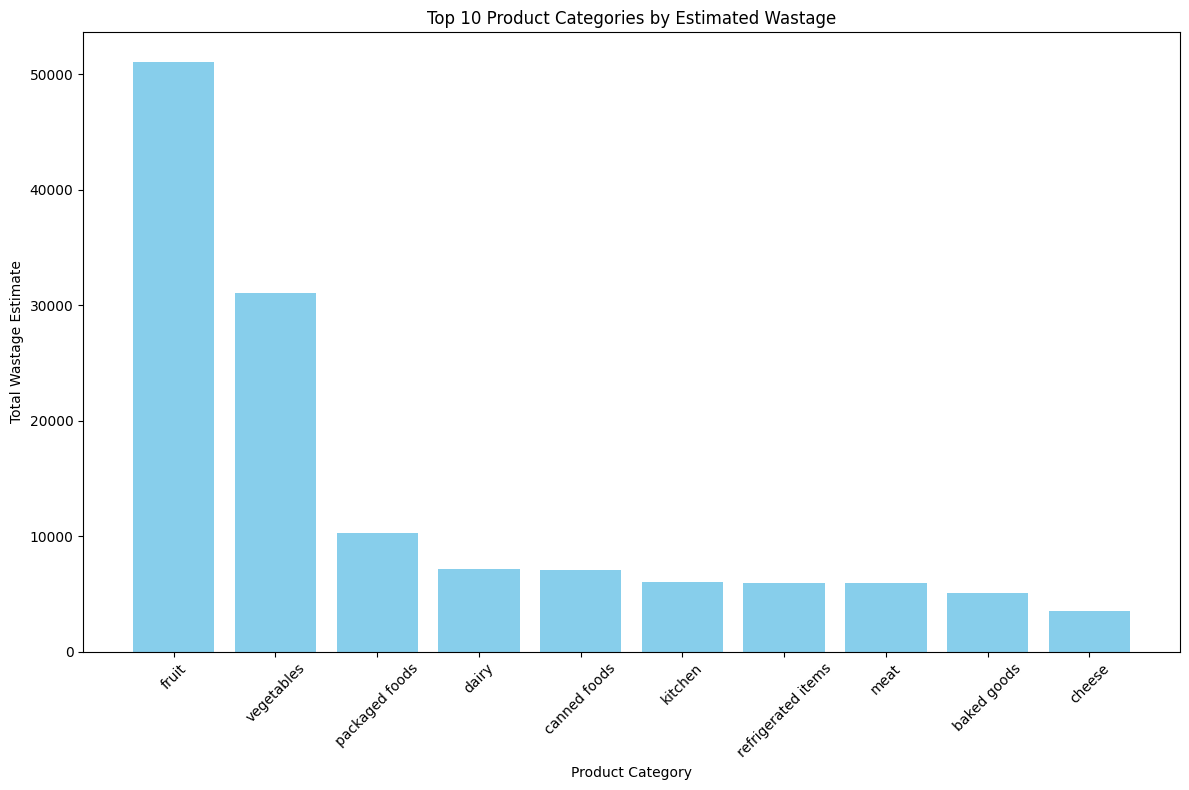

In [22]:
# Aggregating wastage by timestamp and category
wastage_by_category = wastage_df.groupby(['category_y']).agg({'wastage_estimate': 'sum'}).reset_index()

#  Sort by wastage_estimate in descending order to get top 5
top_wastage_df = wastage_by_category.sort_values('wastage_estimate', ascending=False).head(10)

# Inspect the results (show the top 5 categories)
print(top_wastage_df)

# Plotting the top 10 wastage categories
plt.figure(figsize=(12, 8))

# Plotting the top 10 categories
plt.bar(top_wastage_df['category_y'], top_wastage_df['wastage_estimate'], color='skyblue')
plt.title('Top 10 Product Categories by Estimated Wastage')
plt.xlabel('Product Category')
plt.ylabel('Total Wastage Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The wastage estimates reveal that fresh, perishable products such as fruits and vegetables are the most affected by wastage, which is likely due to spoilage. On the other hand, categories like packaged foods and canned foods, which have longer shelf lives, also show significant wastage, suggesting potential inefficiencies in inventory management or demand forecasting. Targeted interventions, including better forecasting models, stock management practices, and promotional strategies, can help reduce wastage, especially in high-wastage categories.
